<a href="https://colab.research.google.com/github/danielli-arcari/AnaliseDeDados_ExperimentoCashbackMeliuz/blob/main/experimento_cashback_meliuz_DanielliArcari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Vendas – Experimento de Cashback

Este projeto tem como objetivo realizar uma análise exploratória dos dados de vendas de um experimento de cashback, observando o comportamento do volume de compras ao longo do tempo.

A análise é descritiva e busca identificar padrões temporais simples, sem inferências estatísticas ou conclusões causais.

A análise foi conduzida com foco em uma única métrica principal
(quantidade de vendas), evitando a combinação de indicadores distintos
para garantir clareza e consistência nos resultados apresentados.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/experimento_cashback_meliuz.csv')

##Conhecendo os dados

In [ ]:
df.head(10)

,usuario_id,data,cashback_aplicado,quantidade_compras,valor_compra,valor_cashback,resultado_meliuz
0,U009,2024-06-01,1.5,1,110.24,1.65,3.86
1,U022,2024-06-01,1.5,2,554.90,8.32,19.43
2,U025,2024-06-01,1.5,2,77.61,1.16,2.72
3,U038,2024-06-01,1.5,1,439.97,6.60,15.40
4,U042,2024-06-01,1.5,1,508.07,7.62,17.78
5,U044,2024-06-01,1.5,1,357.77,5.37,12.52
6,U044,2024-06-01,1.5,1,294.72,4.42,10.32
7,U046,2024-06-01,1.5,1,477.42,7.16,16.71
8,U046,2024-06-01,1.5,1,219.72,3.30,7.69
9,U056,2024-06-01,1.5,1,71.16,1.07,2.49


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   usuario_id          2327 non-null   object 
 1   data                2327 non-null   object 
 2   cashback_aplicado   2327 non-null   float64
 3   quantidade_compras  2327 non-null   int64  
 4   valor_compra        2327 non-null   float64
 5   valor_cashback      2327 non-null   float64
 6   resultado_meliuz    2327 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 127.4+ KB


In [ ]:
df.describe()

,cashback_aplicado,quantidade_compras,valor_compra,valor_cashback,resultado_meliuz
count,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000
mean,2.018908,1.157714,268.922394,5.181990,8.264246
std,0.411918,0.364551,150.978558,2.696488,5.166925
min,1.500000,1.000000,10.410000,0.260000,0.260000
25%,1.500000,1.000000,144.840000,2.940000,4.135000
50%,2.000000,1.000000,252.910000,5.090000,7.210000
75%,2.500000,1.000000,379.560000,7.390000,12.090000
max,2.500000,2.000000,599.660000,11.000000,20.990000


In [ ]:
df.isnull().sum()

,0
usuario_id,0
data,0
cashback_aplicado,0
quantidade_compras,0
valor_compra,0
valor_cashback,0
resultado_meliuz,0


In [ ]:
df = df.dropna()

###Transformando as datas de formato texto para formato data


In [ ]:
#Conversão da coluna de data
df['data'] = pd.to_datetime(df['data'])

In [ ]:
#Criação da coluna de mês
df['mes'] = df['data'].dt.to_period('M')

### Objetivo da Análise

Analisar o volume de vendas ao longo do tempo, observando a quantidade de compras registradas em cada mês do experimento.


## Perguntas de Negócio
Experimento de Cashback da Méliuz

Contexto:
A Méliuz é uma plataforma de cashback que incentiva compras em parceiros por meio da devolução de parte do valor gasto. O crescimento do negócio depende do aumento de usuários ativos, da frequência de compras e do valor médio transacionado.

Problema de Negócio:
Nem todos os usuários ativam ou utilizam o cashback com frequência. A empresa precisava entender se mudanças no incentivo financeiro aumentariam o engajamento e o volume de compras, sem comprometer excessivamente a margem.

Hipótese:
Aumentar o percentual de cashback oferecido a um grupo de usuários gera:

- Mais compras realizadas.
- Maior valor total de vendas.
- Maior recorrência de uso da plataforma.

O Experimento:

- Grupo Controle: usuários com cashback padrão.
- Grupo Teste: usuários com cashback aumentado por um período determinado.

Ambos os grupos expostos às mesmas lojas, canais e condições, mudando apenas o percentual de cashback.

Métricas Avaliadas:

- Número de compras por usuário.
- Valor total gasto.
- Taxa de ativação do cashback.
- Retenção no período do experimento.
- Receita líquida após custo do cashback.

Resultados Observados durante o experimento:

- O grupo com cashback maior apresentou aumento no volume de compras.
- Houve crescimento no faturamento bruto.
- Em alguns casos, o custo adicional do cashback reduziu a margem, exigindo análise de equilíbrio.
- O impacto foi mais forte em usuários já ativos do que em usuários totalmente inativos.

Conclusão de Negócio:
O aumento de cashback pode ser eficiente como estratégia pontual de ativação e aumento de vendas, especialmente para:

- Usuários recorrentes.
- Campanhas sazonais.
- Parcerias estratégicas com lojas específicas.

No entanto, a estratégia não deve ser aplicada de forma permanente e indiscriminada, pois pode reduzir a rentabilidade. O uso ideal é segmentado, baseado em comportamento do usuário e objetivos claros de curto prazo.

Dito isso, seguem as seguintes perguntas a serem respondidas:

1. Quantas vendas ocorreram em cada mês do período analisado?
2. Como o volume de vendas varia ao longo dos meses observados?

In [ ]:
#Agrupamento de vendas por mês
vendas_por_mes = df.groupby('mes').size().reset_index(name='quantidade_vendas')
vendas_por_mes

,mes,quantidade_vendas
0,2024-06,721
1,2024-07,898
2,2024-08,708


### Métrica analisada

Optou-se por analisar a **quantidade de vendas por mês** como métrica principal,
por ser um indicador direto de atividade dos usuários, independentemente
do valor monetário das compras.


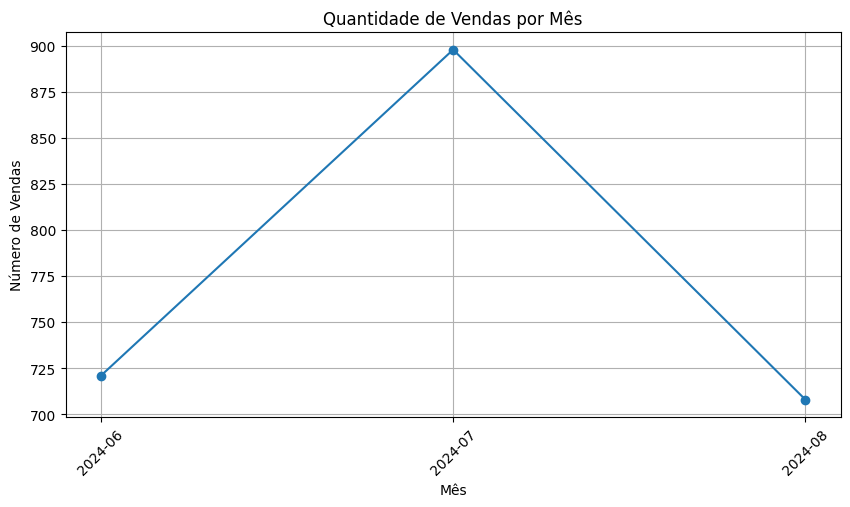

In [ ]:
#Gráfico de vendas mensais
plt.figure(figsize=(10,5))
plt.plot(vendas_por_mes['mes'].astype(str), vendas_por_mes['quantidade_vendas'], marker='o')
plt.xticks(rotation=45)
plt.title('Quantidade de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Vendas')
plt.grid(True)
plt.show()


###Análise Visual

O gráfico apresenta a variação do número de vendas ao longo dos meses analisados. É possível observar períodos com maior volume de compras, seguidos por meses de redução.A análise evidenciou variações no volume de vendas ao longo dos meses analisados.
Essas oscilações indicam que a atividade de compras não se mantém constante
no período observado, reforçando a importância de análises temporais
para acompanhamento de desempenho.



## Vendas por mês

In [ ]:
#Estatísticas descritivas básicas
vendas_por_mes['quantidade_vendas'].describe()

,quantidade_vendas
count,3.000000
mean,775.666667
std,106.142985
min,708.000000
25%,714.500000
50%,721.000000
75%,809.500000
max,898.000000


In [ ]:
#Agrupando a quantidade de vendas por mês
vendas_por_mes = df.groupby('mes').size().reset_index(name='quantidade_vendas')

vendas_por_mes

,mes,quantidade_vendas
0,2024-06,721
1,2024-07,898
2,2024-08,708


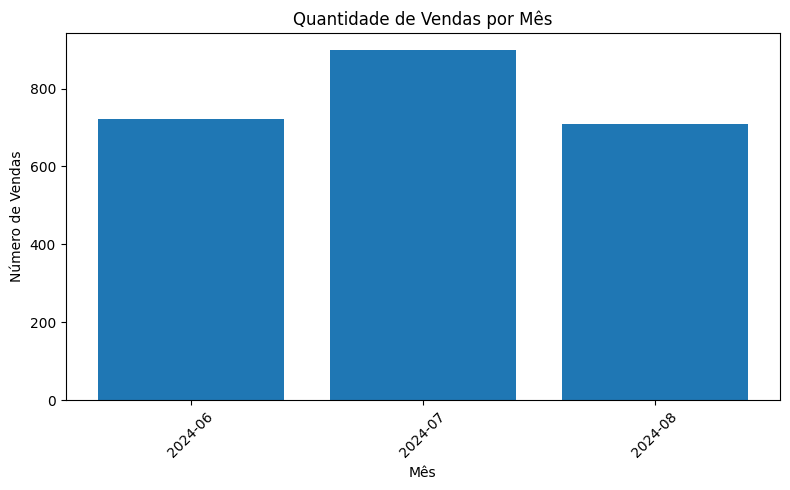

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(vendas_por_mes['mes'].astype(str),
        vendas_por_mes['quantidade_vendas'])

plt.title('Quantidade de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###Observa-se variação na quantidade de vendas entre os meses analisados.
Alguns meses apresentam maior volume de compras, enquanto outros registram redução no número de vendas.


## Conclusão

A análise exploratória mostrou que o volume de vendas variou ao longo dos meses analisados,
não se mantendo constante durante o período observado.

Foram identificados meses com maior quantidade de vendas, seguidos por redução nos meses
subsequentes, indicando que os picos de atividade não se sustentam de forma contínua.
Esses resultados reforçam a importância de acompanhar métricas ao longo do tempo para
entender o comportamento das vendas.
